> # **Weight Initialization Techniques**
> To prevent these issues, different initialization techniques have been developed:
> - `Xavier/Glorat` Initialization
> - `He` Initialization

In [22]:
# Importing necessary libraries
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [23]:
# Forming Dataset
X, y = make_moons(
    n_samples = 500,
    noise = 0.2,
    random_state = 42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

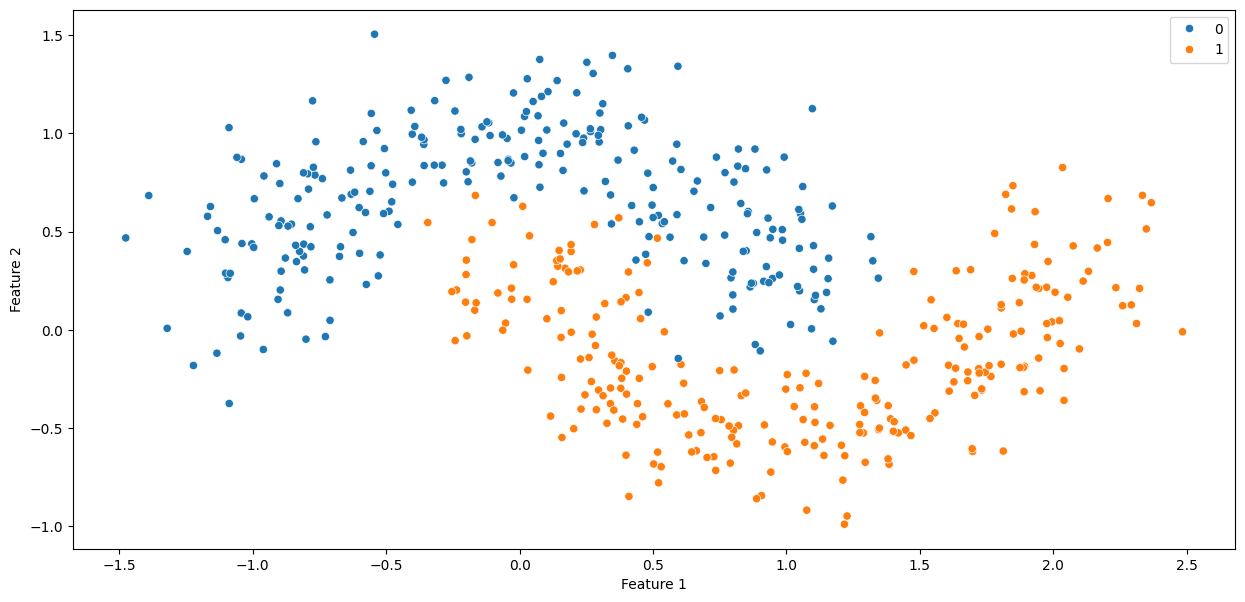

In [24]:
# Data Visualization
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

> ### Xavier/Glorot initialization using Keras - `kernel_initializer`
> Xavier Initialization is particularly well-suited for activation functions like sigmoid and hyperbolic tangent (tanh), where the activation functions are sensitive to the scale of the inputs.

In [25]:
# Model Building and initialization
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Training
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=50, validation_split=0.2, verbose = 1) # Increase the epochs to 500

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.7275 - loss: 0.6006 - val_accuracy: 0.7400 - val_loss: 0.5556
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7650 - loss: 0.5268 - val_accuracy: 0.7700 - val_loss: 0.4969
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7950 - loss: 0.4714 - val_accuracy: 0.7900 - val_loss: 0.4556
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7975 - loss: 0.4306 - val_accuracy: 0.8300 - val_loss: 0.4223
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8075 - loss: 0.3991 - val_accuracy: 0.8300 - val_loss: 0.3937
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8225 - loss: 0.3751 - val_accuracy: 0.8400 - val_loss: 0.3741
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8375 - loss: 0.3551 - val_accuracy: 0.8500 - val_loss: 0.3607
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8400 - loss: 0.3395 - val_accuracy: 0.8600 - v

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step


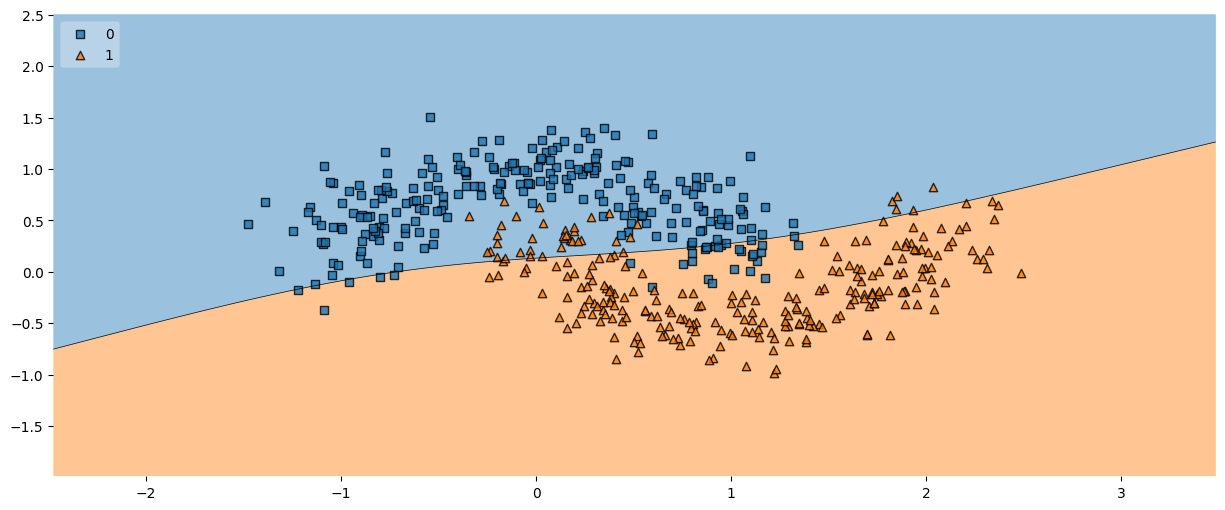

In [27]:
# Plotting Decision Regions
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

> ### He initialization using Keras - `kernel_initializer`
> He Initialization is particularly effective for neural networks that use ReLU or its variants (like Leaky ReLU or Parametric ReLU) as activation functions.

In [30]:
# Model Building
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Training
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=50, validation_split=0.2, verbose = 0)

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step


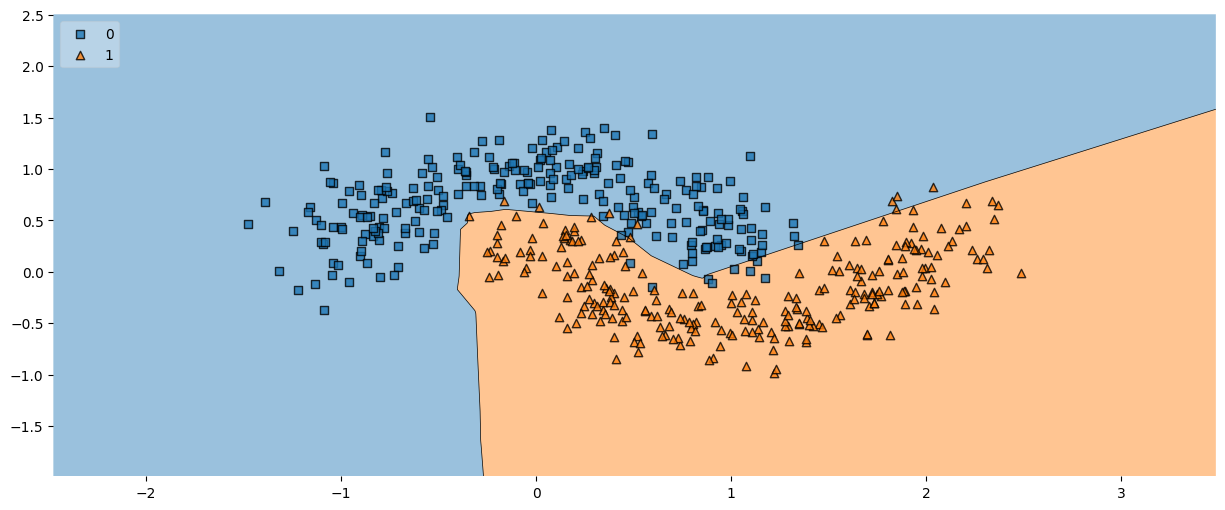

In [32]:
# Decision Regions
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

### `Normal (Gaussian) Distribution`
- Use when input features follow a normal/Gaussian distribution
- Better for deeper networks as it helps maintain consistent variance across layers
- Common choices:
  - Xavier/Glorot Normal: For layers with tanh or sigmoid activation
  - He Normal: For layers with ReLU activation
- Tends to work well with gradient-based optimization

### `Uniform Distribution`
- Use when input features are uniformly distributed
- Good for simpler networks or when computational efficiency is important
- Common choices:
  - Xavier/Glorot Uniform: For tanh or sigmoid activation
  - He Uniform: For ReLU activation
- Can help avoid initial symmetry in weights
- May provide more stable training in some cases
